In [17]:
# load data, graphics packages
import numpy as np
from pylab import *
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# load evaluation package
from sklearn.metrics import r2_score

In [32]:
# generate random datasets
np.random.seed(2)
x = np.random.normal(3.0, 1.0, 100)
y = np.random.normal(50.0, 30.0, 100) / x

In [33]:
# split x and y into train/test as 80/20 ratio
trainX = x[:80]
testX  = x[80:]

trainY = y[:80]
testY  = y[80:]

In [35]:
# check length of train/test samples
len(trainX), len(testX)

(80, 20)

In [36]:
# convert Series into numpy array and fit with a 8 degree pol. function
X_train = np.array(trainX)
Y_train = np.array(trainY)

p8 = np.poly1d(np.polyfit(X_train, Y_train, 8))

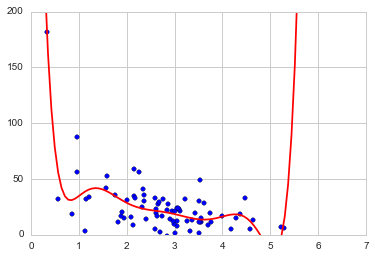

In [37]:
# plot train sample with the fit function
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(X_train, Y_train)
plt.plot(xp, p8(xp), c='r')
plt.show()

In [38]:
# make numpy array of the test samples
X_test = np.array(testX)
Y_test = np.array(testY)

In [39]:
# evaluate the fit function with the test sample
r2 = r2_score(Y_test, p8(X_test))
print r2

0.300181686119


In [40]:
# loop over degree, fit and append an array with results

In [41]:
fitVal= range(0,15)
resVal=[]
for expo in fitVal:
    fit = np.poly1d(np.polyfit(X_train, Y_train, expo))
    res = r2_score(Y_test, fit(X_test))
    print expo,res
    resVal.append(res)

0 -0.0334054228542
1 0.422541406799
2 0.293503179378
3 0.272743114752
4 0.393626926099
5 0.504072389719
6 0.605011947036
7 0.546145145289
8 0.300181686119
9 0.216155095656
10 0.224851678147
11 0.268177652426
12 0.0595268045397
13 0.225960582962
14 0.293772213857


In [27]:
# plot result

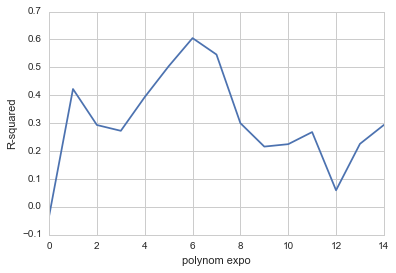

In [28]:
plt.plot(fitVal, resVal)
plt.xlabel('polynom expo')
plt.ylabel('R-squared')

In [42]:
# now repeat with a larger dataset

In [109]:
np.random.seed(2)
xx = np.random.normal(3.0, 1.0, 1000)
yy = np.random.normal(50.0, 30.0, 1000) / xx

trainXX = xx[100:]
testXX  = xx[:100]
trainYY = yy[100:]
testYY  = yy[:100]

In [110]:
len(trainXX), len(testXX)

(900, 100)

In [111]:
XX_train = np.array(trainXX)
YY_train = np.array(trainYY)
XX_test  = np.array(testXX)
YY_test  = np.array(testYY)

In [112]:
fitVal= range(0,15)
resVal2=[]
for expo in fitVal:
    fit = np.poly1d(np.polyfit(XX_train, YY_train, expo))
    res2 = r2_score(YY_test, fit(XX_test))
    print expo,res2
    resVal2.append(res2)

0 -0.0193945785954
1 0.270884624483
2 0.437803432147
3 0.551457499653
4 0.626785136485
5 0.687346684425
6 0.729798450725
7 0.744631261198
8 0.724909338871
9 0.656193768488
10 0.649072088518
11 0.706114359372
12 0.746719333582
13 0.684961492095
14 0.592799351327


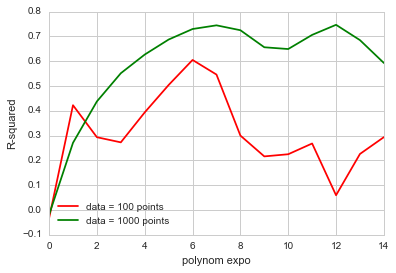

In [113]:
plt.plot(fitVal, resVal,c='r')
plt.plot(fitVal, resVal2,c='g')
plt.xlabel('polynom expo')
plt.ylabel('R-squared')
plt.legend(['data = 100 points', 'data = 1000 points'], loc='lower left')

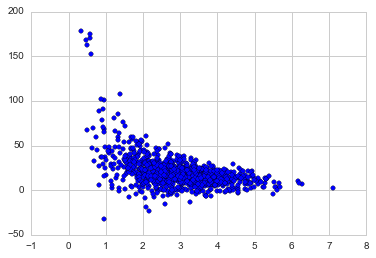

In [114]:
scatter(xx, yy)

## comments
<ul>
<li> for the same seed (2), a dataset 10x bigger gives, as expected, better fluctuations
<li> for this same seed (2), a value around 6 to 8 seems to give the best r-squared
<li> when changing the seed to another value (3), the results for the larger dataset are quite different
<li> the reason may be because the x,y plot is different (see above) and present outlier (even negative value sometimes), then the fit fails
</ul>